In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import datetime
figsize(12, 8)

Populating the interactive namespace from numpy and matplotlib


In [34]:
def massage_data(run):
    # Filter some nonsense values
    run.time = run.time.apply(lambda x: x if x >= 1.47e8 else np.nan)
    run.rpm = run.rpm.apply(lambda x: x if x < 5000 and x >= 0 else np.nan)
    run.ds_volt = run.ds_volt.apply(lambda x: x if x < 400 and x > 100 else np.nan)
    run.ds_cur_48v = run.ds_cur_48v.apply(lambda x: x if x >= 0 else np.nan)
    
    # Fill forward
    run.fillna(method='pad', inplace=True)
    run.fillna(method='bfill', inplace=True) # If there are any nan at the beginning, fix them too
    
#     run.time = run.time.apply(datetime.datetime.fromtimestamp)
#     run.set_index(run.time, drop=True, inplace=True)
#     del run["time"]
#     del run["soc"]
    for col in run:
        run[col].index = run.index

    return run

In [40]:
run5 = pd.read_csv("test_logs/2016-07-05_run5.csv")
run5 = massage_data(run5)

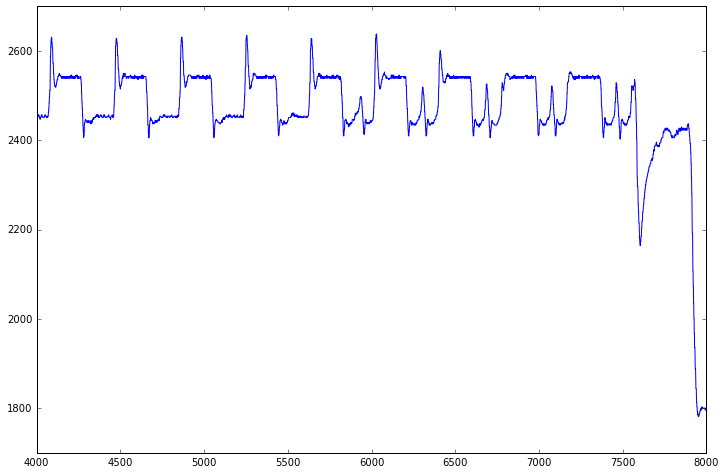

In [42]:
run5[4000:8000].rpm.plot()